In [20]:
import websocket
import config
import ccxt
import json
import pandas as pd

In [3]:
exchange =  ccxt.binance({
    'apiKey' : config.API_KEY,
    'secret' : config.API_SECRET
})

In [4]:
balanceSpot = exchange.fetch_balance({
    'type' : 'spot'
})
balanceMargin = exchange.fetch_balance({
    'type' : 'margin'
})


In [5]:
symbols = set()
for bal in balanceSpot['info']['balances']:
    if float(bal['free']) > 0:
        symbols.add(bal['asset'])

In [6]:
for val in balanceMargin['info']['userAssets']:
    if float(val['netAsset']) > 0:
        symbols.add(val['asset'])

In [7]:
symbols.remove('USDT')
print(symbols)

{'BTT', 'XRP', 'ETH', 'LINK', 'EOS', 'BCH', 'BTC', 'DOT', 'TRX', 'ADA', 'BNB', 'LTC', 'NEO', 'ETC'}


In [11]:
since = exchange.milliseconds () - 30 * 86400000  # -1 day from now
orders = []
for symbol in symbols:
    SymbolinUSDT = f'{symbol}/USDT'
    orders += exchange.fetch_closed_orders(SymbolinUSDT,since, 10 ,{'type' : 'margin'})

In [12]:
buyOrders = {}
for val in orders:
    if val['info']['side'] == 'BUY':
        symbol = val['info']['symbol'].lower()
        quantity = val['info']['executedQty']
        totalMoneyinUSDT = val['info']['cummulativeQuoteQty']
        buyOrders[symbol] = {'totalamountinUSDT': totalMoneyinUSDT, 'quantity' : quantity}
        #print(val)
print(buyOrders)

{'bttusdt': {'totalamountinUSDT': '46.143996', 'quantity': '5053'}, 'linkusdt': {'totalamountinUSDT': '199.96811', 'quantity': '5.015'}, 'eosusdt': {'totalamountinUSDT': '199.99596', 'quantity': '30.83'}, 'dotusdt': {'totalamountinUSDT': '450.95892', 'quantity': '12.45'}, 'adausdt': {'totalamountinUSDT': '209.95146', 'quantity': '154.9'}, 'ltcusdt': {'totalamountinUSDT': '629.4634875', 'quantity': '2.29941'}, 'neousdt': {'totalamountinUSDT': '199.912676', 'quantity': '2.066'}}


In [13]:
symbolList = buyOrders.keys()
symbolurl = ""
for x in symbolList:
    symbolurl += f'{x.lower()}@kline_1m/'
symbolurl = symbolurl[:-1]
print(symbolurl)

bttusdt@kline_1m/linkusdt@kline_1m/eosusdt@kline_1m/dotusdt@kline_1m/adausdt@kline_1m/ltcusdt@kline_1m/neousdt@kline_1m


In [35]:
symbol1 = 'dotusdt'
timeframe1 = '1m'
symbol2 = 'adausdt'
symbolList = buyOrders.keys()
socket = f"wss://stream.binance.com:9443/stream?streams={symbolurl}"
#socket = f"wss://stream.binance.com:9443/stream?streams=adausdt@kline_1m"
print(socket)

wss://stream.binance.com:9443/stream?streams=bttusdt@kline_1m/linkusdt@kline_1m/eosusdt@kline_1m/dotusdt@kline_1m/adausdt@kline_1m/ltcusdt@kline_1m/neousdt@kline_1m


In [38]:
from IPython.display import clear_output
from tabulate import tabulate
data = {}
def on_message(ws, message):
    obj = json.loads(message)
    #print(obj)
    # Pretty Print JSON
    #json_formatted_str = json.dumps(obj['data'], indent=4)
    symbol, cur_price = obj['data']['s'].lower(), float(obj['data']['k']['c'])
    buy_price = float(buyOrders[symbol]['totalamountinUSDT'])
    new_price = cur_price * float(buyOrders[symbol]['quantity'])
    
    perChange = (new_price - buy_price) * 100 / buy_price
    #data[symbol] = {'cur_price' : cur_price, 'Bought_price' : buy_price, 'PercentageChange' : perChange}
    data[symbol] = {'PercentageChange' : perChange}
    clear_output(wait=True)
    df = pd.DataFrame(data)
    print(tabulate(df, headers = 'keys', tablefmt = 'psql'))

def on_close(ws):
    print("### closed ###")

def on_error(ws, error):
    print(error)

ws = websocket.WebSocketApp(socket ,on_message = on_message, on_close = on_close, on_error=on_error)

In [41]:
ws.run_forever()

+------------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+
|                  |   linkusdt |   ltcusdt |   bttusdt |   eosusdt |   adausdt |   dotusdt |   neousdt |
|------------------+------------+-----------+-----------+-----------+-----------+-----------+-----------|
| PercentageChange |    19.5842 |   25.2639 |  -20.4249 |   56.6843 |   22.9821 |   8.33591 |   21.2631 |
+------------------+------------+-----------+-----------+-----------+-----------+-----------+-----------+

### closed ###


False

In [42]:
print(data)

{'linkusdt': {'PercentageChange': 19.584190199127242}, 'ltcusdt': {'PercentageChange': 25.263926940639273}, 'bttusdt': {'PercentageChange': -20.424879544459046}, 'eosusdt': {'PercentageChange': 56.68430802302206}, 'adausdt': {'PercentageChange': 22.98214549210565}, 'dotusdt': {'PercentageChange': 8.335910064712763}, 'neousdt': {'PercentageChange': 21.263099894676}}


<AxesSubplot:>

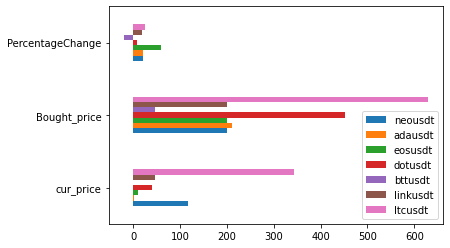

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
liner, = ax.plot()
plt.ion()
plt.show()
for i in range(len(benchmark_returns.values)):
    liner.set_ydata(benchmark_returns['Crypto 30'][:i])
    liner.set_xdata(benchmark_returns.index[:i])
    plt.pause(0.01)

ValueError: not enough values to unpack (expected 1, got 0)

<ipython-input-49-703d78a7112d>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


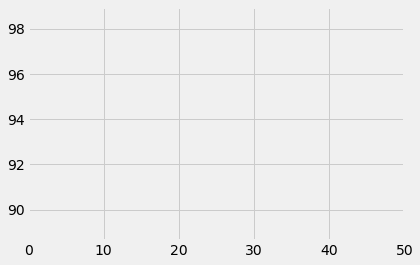

KeyboardInterrupt: 

In [49]:
import time
import psutil
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

i = 0
x, y = [], []

while True:
    x.append(i)
    y.append(psutil.cpu_percent())

    ax.plot(x, y, color='b')

    fig.canvas.draw()

    ax.set_xlim(left=max(0, i - 50), right=i + 50)
    fig.show()
    plt.pause(0.05)
    i += 1

In [ ]:
import time
import psutil
import matplotlib.pyplot as plt
import random

fig = plt.figure()
ax = fig.add_subplot(111)
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
i = 0
x, y = ['apple', 'banana'], [10 , 24]

while True:
    y[random.randrange(0,len(y) - 1)] += random.randrange(-5, 6)
    ax.bar(x, y, color='b')

    fig.canvas.draw()

   # ax.set_xlim(left=max(0, i - 50), right=i + 50)
    fig.show()
    plt.pause(0.05)
    i += 1